In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn import linear_model
import pickle
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
data = pd.read_csv('student_mat.csv', sep=";")

data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data= shuffle(data)

In [3]:
print(data.head())

     G1  G2  G3  studytime  failures  absences
122  13  13  13          2         0         2
272  11  11  11          2         0         2
173   8   7   0          2         3         0
29   10  12  11          2         0        16
190  11  12  13          2         0        10


In [4]:
predict = "G3"

In [5]:
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [6]:
# linear = linear_model.LinearRegression()
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
#
# print(acc)
# print("Coefficient: ", linear.coef_) # współczynnik - wartość każdego nachylenia
# print("Intercepr:", linear.intercept_) # przechwyt
#
# predictions = linear.predict(x_test) # a list of all predicitons
# for i in range(len(predictions)):
#     print(predictions[i], x_test[i], y_test[i])
#
# with open("student_grades.pickle", "wb") as f:
#     pickle.dump(linear, f)


In [7]:
best = 0
for i in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: ", str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy:  0.7935866593535106
Accuracy:  0.7675221022841536
Accuracy:  0.8647584671575421
Accuracy:  0.7653787553549537
Accuracy:  0.8429537536783005
Accuracy:  0.7674919418541204
Accuracy:  0.7795674103761097
Accuracy:  0.9128716729543752
Accuracy:  0.8503879875263367
Accuracy:  0.7456460539402057
Accuracy:  0.8147133547943739
Accuracy:  0.9219604786171933
Accuracy:  0.603019418488605
Accuracy:  0.801495881447662
Accuracy:  0.7317205683000045
Accuracy:  0.7840858538773849
Accuracy:  0.7334487595121737
Accuracy:  0.921639432827126
Accuracy:  0.875393252193888
Accuracy:  0.8611443121068647


In [8]:
prediction = linear.predict(x_test)
for i in range(len(prediction)):
    print(prediction[i], x_test[i], y_test[i])

7.843142639794813 [7 9 3 0 0] 8
13.126539085666368 [14 13  2  0  2] 13
3.4555584145103433 [3 5 2 1 8] 5
9.743080121582508 [11 10  2  1 12] 10
11.755054767097054 [14 12  2  1  0] 12
8.271854993353307 [8 9 2 0 2] 10
10.62996913940284 [11 11  2  0  0] 10
12.247524671763241 [12 12  2  0 14] 12
10.418561315968523 [10 11  4  0 10] 11
6.423653052816121 [ 7  8  2  3 10] 10
12.697826732107874 [13 13  3  0  0] 14
9.404815224964727 [ 9 10  2  0  2] 10
3.626270275299305 [7 5 3 1 0] 0
9.635464708005415 [10 10  2  0  4] 11
5.267396486537093 [8 7 2 3 0] 0
-0.7550328232054887 [12  0  3  2  0] 0
11.045336540044824 [11 11  2  0 12] 11
-0.8352972270537371 [7 0 1 1 0] 0
11.63409440060345 [12 12  3  0  2] 11
16.492833167977746 [16 16  1  0  0] 15
12.431912037416625 [14 12  2  0 10] 11
15.069616383021831 [14 15  2  0  2] 15
6.506225905839628 [8 8 1 3 2] 10
15.507949566383505 [15 15  2  0 10] 15
11.18444360185588 [ 9 12  3  0  3] 11
14.065491121821218 [13 14  1  0  0] 13
8.465863188809877 [10  9  3  0  4] 9


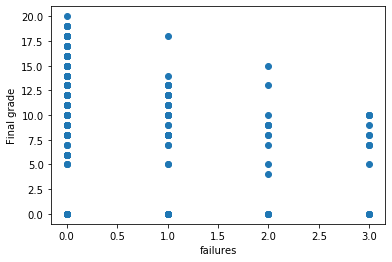

In [10]:
plot = "failures"
plt.scatter(data[plot], data['G3'])
plt.xlabel("failures")
plt.ylabel("Final grade")
plt.show()